## Importing libraries for data analysis

In [6]:
#!pip install pandas-datareader
#!pip install cufflinks

In [7]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#import if you want to read the data directly form the API using pandas_datareader
import pandas_datareader.data as web

# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
#from pandas_datareader import data as pdr

#import yfinance as yf
#yf.pdr_override() 

# Use Pandas Web Datareader to download the stocks prices for large Alberta oil producers from Yahoo Finance

In [149]:
start = datetime.datetime(2016, 3, 1)
end = datetime.datetime(2022, 2, 1)

Suncor = web.DataReader("SU", 'yahoo', start, end)
CNRL = web.DataReader("CNQ", 'yahoo', start, end)
Cenovus = web.DataReader("CVE", 'yahoo', start, end)
CrescentPoint = web.DataReader("CPG.TO", 'yahoo', start, end)
Imperial = web.DataReader("IMO", 'yahoo', start, end)
Ovintiv = web.DataReader("OVV", 'yahoo', start, end)

# Download the stocks prices for large US oil producers 

In [150]:
ExxonMobil = web.DataReader("XOM", 'yahoo', start, end)
Chevron = web.DataReader("CVX", 'yahoo', start, end)
ConocoPhillips = web.DataReader("COP", 'yahoo', start, end)
EOGResources = web.DataReader("EOG", 'yahoo', start, end)
OccidentalPetroleum = web.DataReader("OXY", 'yahoo', start, end)

## Take a look at recent stock prices for Suncor and Chevron. Make sure the data sets have been downloaded properly.

In [153]:
CrescentPoint.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-26,8.44,8.06,8.36,8.18,5669800.0,8.139990
2022-01-27,8.44,7.95,8.37,8.15,5377000.0,8.110136
2022-01-28,8.30,8.02,8.25,8.17,4480800.0,8.130038
2022-01-31,8.27,8.05,8.25,8.19,3946900.0,8.149940
2022-02-01,8.55,8.08,8.18,8.52,6064600.0,8.478327


In [154]:
EOGResources.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-26,109.900002,106.070000,107.669998,107.529999,5122500.0,106.608421
2022-01-27,111.279999,107.750000,109.669998,109.750000,6217600.0,108.809395
2022-01-28,110.949997,107.419998,109.750000,109.699997,3832600.0,108.759819
2022-01-31,113.199997,107.680000,110.529999,111.480003,5685000.0,110.524574
2022-02-01,114.930000,109.970001,110.180000,113.180000,4590900.0,112.209999


# Concatinate all datasets into a single dataset 'cop' for canadian oil producers and check the head of the dataset

In [157]:
#stocks list for combined dataset
CAD_stocks = ["SU", "CNQ", "CVE", "IMO", "CPG.TO", "OVV"]
#concatinating data into Canadian Oil Producers
cop = pd.concat([Suncor, CNRL, Cenovus, Imperial, CrescentPoint, Ovintiv], axis=1, keys=CAD_stocks)
cop.head()

SU                                                         \
                 High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2016-03-01  25.209999  24.650000  24.700001  25.059999  4728100.0  18.696672   
2016-03-02  24.900000  24.080000  24.730000  24.870001  4042800.0  18.772156   
2016-03-03  25.230000  24.639999  24.850000  24.959999  5763600.0  18.840084   
2016-03-04  25.510000  24.920000  25.160000  25.320000  4917000.0  19.111818   
2016-03-07  26.350000  25.180000  25.190001  26.040001  5166800.0  19.655283   

                  CNQ                                   ...     CPG.TO  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2016-03-01  21.559999  21.059999  21.090000  21.459999  ...  16.709999   
2016-03-02  22.469999  21.040001  21.209999  22.459999  ...  16.830000   
2016-03-03  24.680000  23.000000  23.000000  24.500000  ...  17.360001   
2016-03-04  25.920000  24.740000  24.750000  25.830000  ...  18.000000   
2016-03-07  26.280001  25.600000  25.600000  26.139999  ...  18.320000   

                                               OVV                        \
                Close     Volume  Adj Close   High        Low       Open   
Date                                                                       
2016-03-01  16.969999  2670000.0  14.881885  21.85  20.200001  21.850000   
2016-03-02  17.250000  3922100.0  15.127436  23.10  20.900000  20.950001   
2016-03-03  17.780001  3038500.0  15.592219  25.15  22.600000  22.850000   
2016-03-04  18.040001  4149300.0  15.820230  28.50  24.500000  25.150000   
2016-03-07  18.700001  3765500.0  16.399012  30.65  27.100000  27.400000   

                                             
                Close     Volume  Adj Close  
Date                                         
2016-03-01  21.500000  4488440.0  19.161894  
2016-03-02  22.950001  4569200.0  20.454208  
2016-03-03  24.650000  4472040.0  21.969330  
2016-03-04  27.350000  8429520.0  24.375711  
2016-03-07  30.500000  6455780.0  27.183153  

[5 rows x 36 columns]

In [158]:
#stocks list for combined dataset
USA_stocks = ["XOM", "CVX", "COP", "EOG", "OXY"]
#concatinating data into US Oil Producers
usop = pd.concat([ExxonMobil, Chevron, ConocoPhillips, EOGResources, OccidentalPetroleum], axis=1, keys=USA_stocks)
usop.head()

XOM                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2016-03-01  81.769997  80.320000  80.559998  81.279999  15730600.0  60.336693   
2016-03-02  82.720001  80.309998  80.949997  82.699997  14094400.0  61.390797   
2016-03-03  82.720001  81.540001  82.660004  82.400002  13216200.0  61.168095   
2016-03-04  82.970001  81.760002  82.660004  82.290001  18402700.0  61.086449   
2016-03-07  84.459999  82.209999  82.309998  84.459999  18945600.0  62.697304   

                  CVX                                   ...        EOG  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2016-03-01  86.529999  83.370003  84.120003  86.129997  ...  65.099998   
2016-03-02  87.180000  84.400002  85.400002  87.139999  ...  64.949997   
2016-03-03  87.570000  86.050003  87.000000  87.529999  ...  66.949997   
2016-03-04  88.620003  86.699997  87.419998  87.930000  ...  69.910004   
2016-03-07  90.760002  87.550003  87.940002  90.669998  ...  71.120003   

                                                   OXY                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2016-03-01  65.019997  7542900.0  57.150974  70.599998  68.570000  69.250000   
2016-03-02  67.000000  5243400.0  58.891338  71.660004  69.570000  70.080002   
2016-03-03  69.250000  6644400.0  60.869034  71.620003  69.379997  71.589996   
2016-03-04  71.410004  7930800.0  62.767620  71.000000  69.150002  70.699997   
2016-03-07  75.470001  8446300.0  66.336258  70.739998  68.320000  70.070000   

                                             
                Close     Volume  Adj Close  
Date                                         
2016-03-01  70.449997  4472100.0  55.790638  
2016-03-02  71.610001  4522400.0  56.709286  
2016-03-03  70.489998  6663200.0  55.822334  
2016-03-04  69.720001  5744800.0  55.212543  
2016-03-07  70.349998  6939600.0  55.711452  

[5 rows x 30 columns]

## Provide the column names 'Entity' and 'Stock' for empty lists and make sure change is applied

In [159]:
cop.columns.names
usop.columns.names

FrozenList([None, None])

In [160]:
cop.columns.names = ['Entity','Stock']
cop.head() 

Entity             SU                                                         \
Stock            High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2016-03-01  25.209999  24.650000  24.700001  25.059999  4728100.0  18.696672   
2016-03-02  24.900000  24.080000  24.730000  24.870001  4042800.0  18.772156   
2016-03-03  25.230000  24.639999  24.850000  24.959999  5763600.0  18.840084   
2016-03-04  25.510000  24.920000  25.160000  25.320000  4917000.0  19.111818   
2016-03-07  26.350000  25.180000  25.190001  26.040001  5166800.0  19.655283   

Entity            CNQ                                   ...     CPG.TO  \
Stock            High        Low       Open      Close  ...       Open   
Date                                                    ...              
2016-03-01  21.559999  21.059999  21.090000  21.459999  ...  16.709999   
2016-03-02  22.469999  21.040001  21.209999  22.459999  ...  16.830000   
2016-03-03  24.680000  23.000000  23.000000  24.500000  ...  17.360001   
2016-03-04  25.920000  24.740000  24.750000  25.830000  ...  18.000000   
2016-03-07  26.280001  25.600000  25.600000  26.139999  ...  18.320000   

Entity                                         OVV                        \
Stock           Close     Volume  Adj Close   High        Low       Open   
Date                                                                       
2016-03-01  16.969999  2670000.0  14.881885  21.85  20.200001  21.850000   
2016-03-02  17.250000  3922100.0  15.127436  23.10  20.900000  20.950001   
2016-03-03  17.780001  3038500.0  15.592219  25.15  22.600000  22.850000   
2016-03-04  18.040001  4149300.0  15.820230  28.50  24.500000  25.150000   
2016-03-07  18.700001  3765500.0  16.399012  30.65  27.100000  27.400000   

Entity                                       
Stock           Close     Volume  Adj Close  
Date                                         
2016-03-01  21.500000  4488440.0  19.161894  
2016-03-02  22.950001  4569200.0  20.454208  
2016-03-03  24.650000  4472040.0  21.969330  
2016-03-04  27.350000  8429520.0  24.375711  
2016-03-07  30.500000  6455780.0  27.183153  

[5 rows x 36 columns]

In [161]:
usop.columns.names = ['Entity','Stock']
usop.head() 

Entity            XOM                                                          \
Stock            High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2016-03-01  81.769997  80.320000  80.559998  81.279999  15730600.0  60.336693   
2016-03-02  82.720001  80.309998  80.949997  82.699997  14094400.0  61.390797   
2016-03-03  82.720001  81.540001  82.660004  82.400002  13216200.0  61.168095   
2016-03-04  82.970001  81.760002  82.660004  82.290001  18402700.0  61.086449   
2016-03-07  84.459999  82.209999  82.309998  84.459999  18945600.0  62.697304   

Entity            CVX                                   ...        EOG  \
Stock            High        Low       Open      Close  ...       Open   
Date                                                    ...              
2016-03-01  86.529999  83.370003  84.120003  86.129997  ...  65.099998   
2016-03-02  87.180000  84.400002  85.400002  87.139999  ...  64.949997   
2016-03-03  87.570000  86.050003  87.000000  87.529999  ...  66.949997   
2016-03-04  88.620003  86.699997  87.419998  87.930000  ...  69.910004   
2016-03-07  90.760002  87.550003  87.940002  90.669998  ...  71.120003   

Entity                                             OXY                        \
Stock           Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2016-03-01  65.019997  7542900.0  57.150974  70.599998  68.570000  69.250000   
2016-03-02  67.000000  5243400.0  58.891338  71.660004  69.570000  70.080002   
2016-03-03  69.250000  6644400.0  60.869034  71.620003  69.379997  71.589996   
2016-03-04  71.410004  7930800.0  62.767620  71.000000  69.150002  70.699997   
2016-03-07  75.470001  8446300.0  66.336258  70.739998  68.320000  70.070000   

Entity                                       
Stock           Close     Volume  Adj Close  
Date                                         
2016-03-01  70.449997  4472100.0  55.790638  
2016-03-02  71.610001  4522400.0  56.709286  
2016-03-03  70.489998  6663200.0  55.822334  
2016-03-04  69.720001  5744800.0  55.212543  
2016-03-07  70.349998  6939600.0  55.711452  

[5 rows x 30 columns]

# Check the min and max of adjusted closing stock prices for given period. This is a finally adjusted price the stocks were traded by the end of the day.

In [162]:
max_CAD_stock = cop.xs(key='Adj Close',axis=1,level='Stock').max()
max_CAD_stock

Entity
SU        34.955956
CNQ       52.373798
CVE       15.107149
IMO       42.931610
CPG.TO    20.427500
OVV       64.322365
dtype: float64

In [163]:
## The highest stock price for the last 10 year period is CNRL

In [164]:
max_US_stock = usop.xs(key='Adj Close',axis=1,level='Stock').max()
max_US_stock

Entity
XOM     79.943748
CVX    133.963501
COP     91.081856
EOG    118.369591
OXY     76.148621
dtype: float64

In [165]:
## The lowest CAD oil company stock price for the 10 year period is CrescentPoint.

In [168]:
min_CAD_stock = cop.xs(key='Close',axis=1,level='Stock').min()
min_CAD_stock

Entity
SU        10.45
CNQ        7.74
CVE        1.60
IMO        7.83
CPG.TO     0.90
OVV        2.22
dtype: float64

In [169]:
## The lowest us oil company stock price for the 10 year period is OccidentalPetroleum.

In [171]:
min_US_stock = usop.xs(key='Close',axis=1,level='Stock').min()
min_US_stock

Entity
XOM    31.450001
CVX    54.220001
COP    22.670000
EOG    29.760000
OXY     8.880000
dtype: float64

## Let's visualise the information about min and max prices using bar plots.  

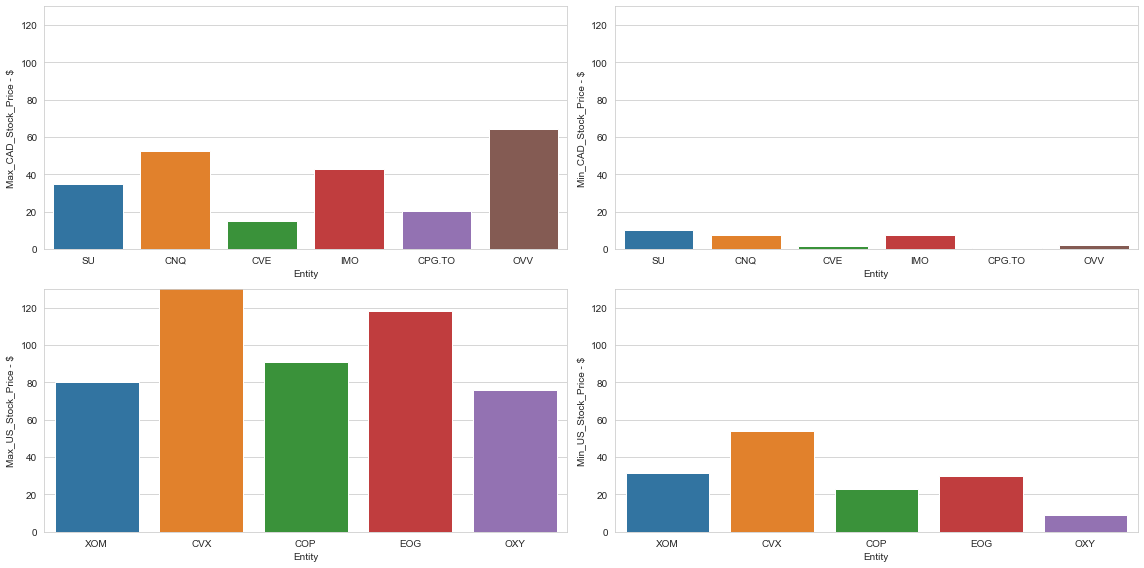

In [172]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[16, 8])
axes = axes.flatten()

sns.barplot(max_CAD_stock.index, max_CAD_stock.values, ax=axes[0])
axes.flatten()[0].set_ylim(0,130)
axes.flatten()[0].set_ylabel('Max_CAD_Stock_Price - $')

sns.barplot(min_CAD_stock.index, min_CAD_stock.values, ax=axes[1])
axes.flatten()[1].set_ylim(0,130)
axes.flatten()[1].set_ylabel('Min_CAD_Stock_Price - $')
plt.tight_layout()

sns.barplot(max_US_stock.index, max_US_stock.values, ax=axes[2])
axes.flatten()[2].set_ylim(0,130)
axes.flatten()[2].set_ylabel('Max_US_Stock_Price - $')

sns.barplot(min_US_stock.index, min_US_stock.values, ax=axes[3])
axes.flatten()[3].set_ylim(0,130)
axes.flatten()[3].set_ylabel('Min_US_Stock_Price - $')
plt.tight_layout()

# Let put all the companies together one one plot to visualize Canadian Oil Companies stock prices with time.

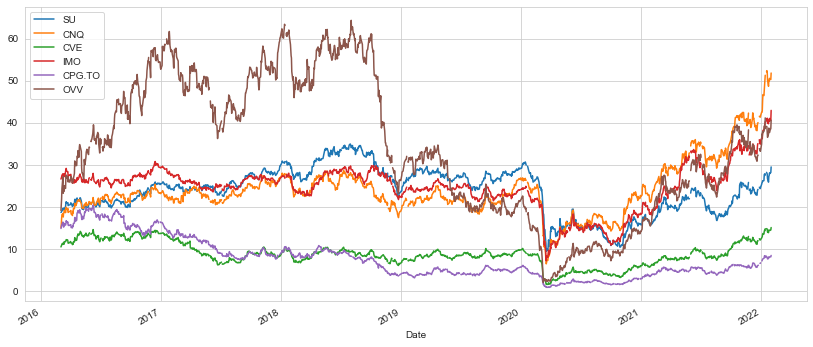

In [173]:
for stock in CAD_stocks:
    cop[stock]['Adj Close'].plot(figsize=(14,6),label=stock)
plt.legend()

# Visualize US Oil Companies stock prices with time.

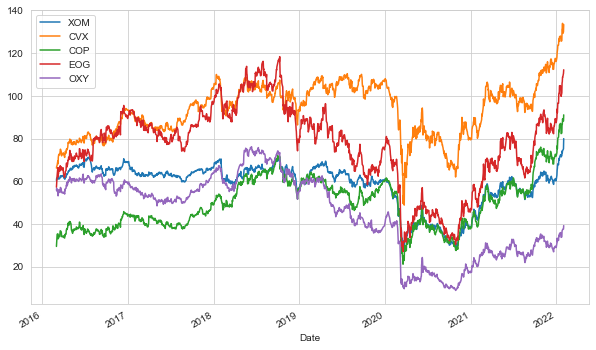

In [174]:
for stock in USA_stocks:
    usop[stock]['Adj Close'].plot(figsize=(10,6),label=stock)
plt.legend()

# Look at the Oil Companies stock price when pandemic striked

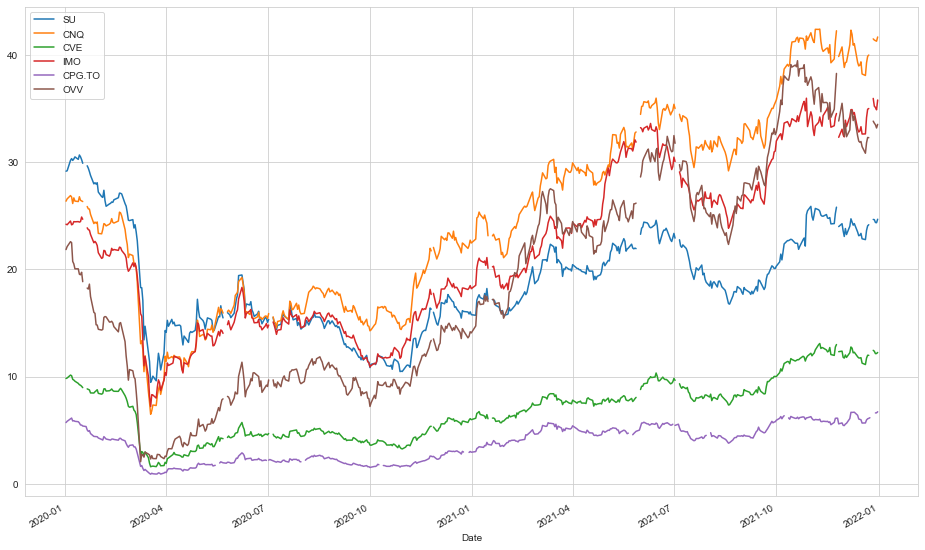

In [175]:
for stock in CAD_stocks:
    cop[stock]['Adj Close'].loc['2020-01-01':'2022-01-01'].plot(figsize=(16,10),label=stock)
plt.legend()

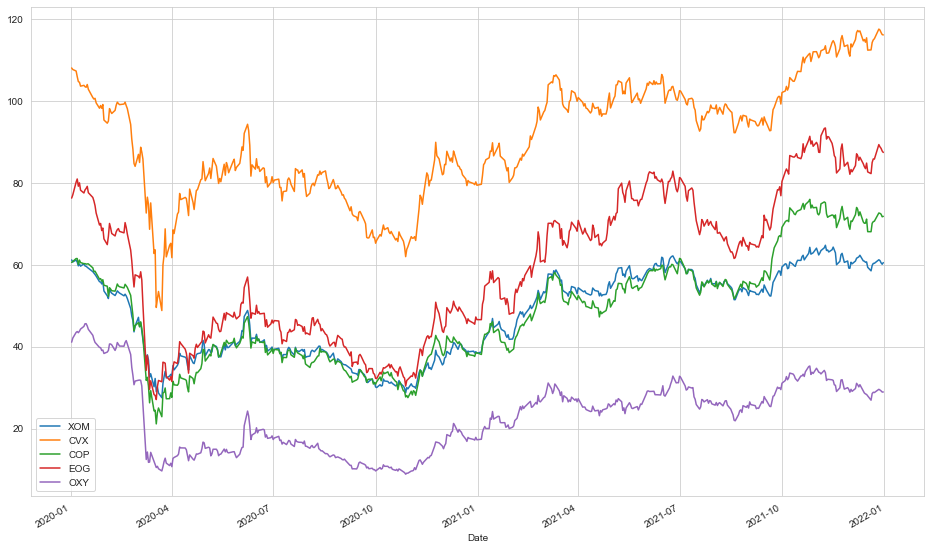

In [176]:
for stock in USA_stocks:
    usop[stock]['Adj Close'].loc['2020-01-01':'2022-01-01'].plot(figsize=(16,10),label=stock)
plt.legend()

## Visualizing stock prices vs. time using interactive data plotting(iplot). The recent significant price drop occured in 2020 when pandemic started.

In [177]:
cop.xs(key='Adj Close',axis=1,level='Stock').iplot()

## We want to calculate Return - the expected value, of the probability distribution of investment returns

In [178]:
CAD_returns = pd.DataFrame()
for stock in CAD_stocks:
    CAD_returns[stock+' Return'] = cop[stock]['Adj Close'].pct_change()
CAD_returns.head()

,SU Return,CNQ Return,CVE Return,IMO Return,CPG.TO Return,OVV Return
Date,,,,,,
2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-02,0.004037,0.046598,0.022090,0.009486,0.016500,0.067442
2016-03-03,0.003619,0.090828,0.013300,0.009892,0.030725,0.074074
2016-03-04,0.014423,0.054286,0.028712,0.014386,0.014623,0.109534
2016-03-07,0.028436,0.012001,0.017544,0.012976,0.036585,0.115174


In [179]:
US_returns = pd.DataFrame()
for stock in USA_stocks:
    US_returns[stock+' Return'] = usop[stock]['Adj Close'].pct_change()
US_returns.head()

,XOM Return,CVX Return,COP Return,EOG Return,OXY Return
Date,,,,,
2016-03-01,NaN,NaN,NaN,NaN,NaN
2016-03-02,0.017470,0.011726,0.058909,0.030452,0.016466
2016-03-03,-0.003628,0.004476,0.056728,0.033582,-0.015640
2016-03-04,-0.001335,0.004570,0.066390,0.031191,-0.010924
2016-03-07,0.026370,0.031161,0.006809,0.056855,0.009036


In [180]:
## Let's visualize our returns using pair plot

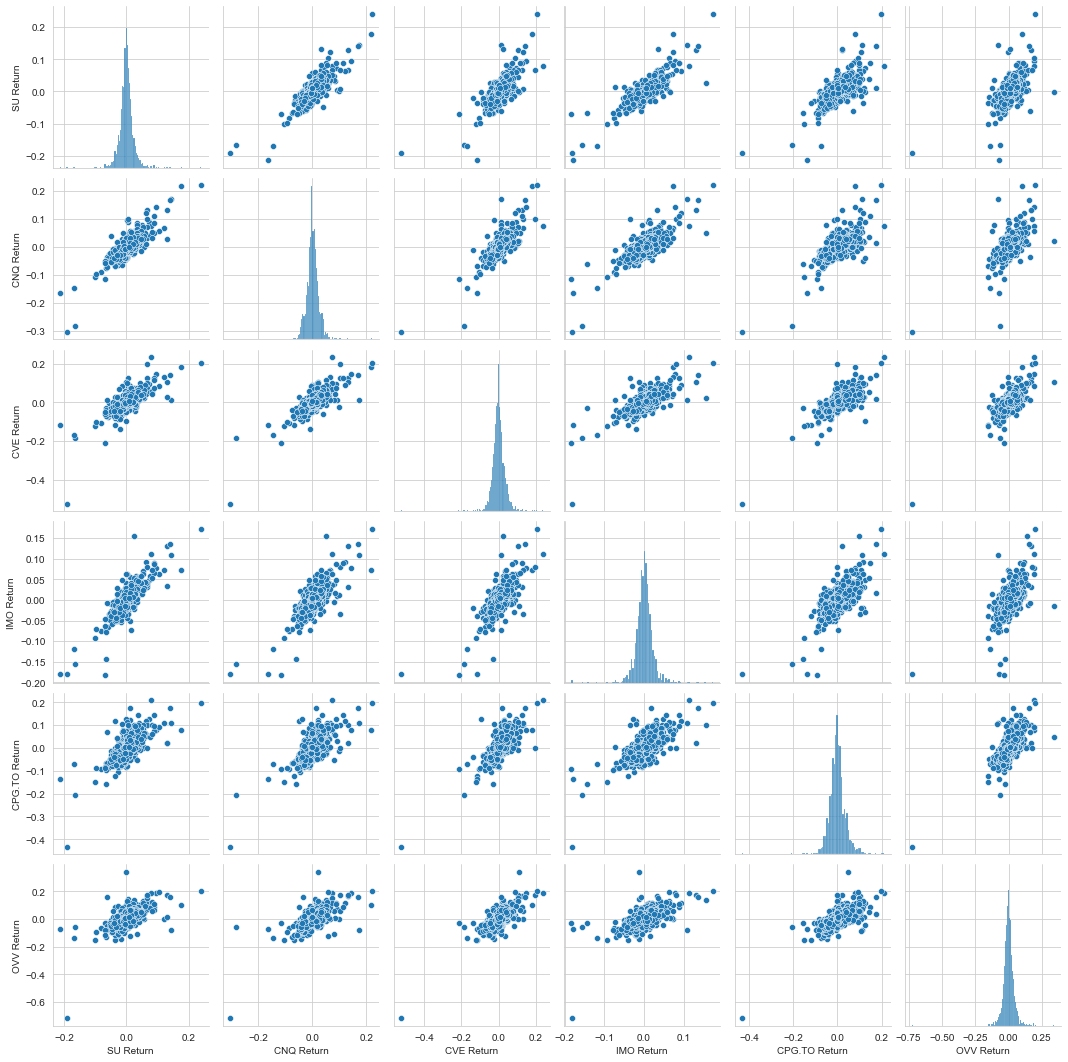

In [181]:
import seaborn as sns
sns.pairplot(CAD_returns[1:]) # avoiding NaN row

## I would like to look at best gain day and worst drop day for Canadian oil companies using idxmax and idxmin.

In [182]:
print(CAD_returns.idxmax(), CAD_returns.idxmin())

SU Return       2020-11-09
CNQ Return      2020-11-09
CVE Return      2020-04-02
IMO Return      2020-11-09
CPG.TO Return   2020-04-02
OVV Return      2020-03-10
dtype: datetime64[ns] SU Return       2020-03-12
CNQ Return      2020-03-09
CVE Return      2020-03-09
IMO Return      2020-03-17
CPG.TO Return   2020-03-09
OVV Return      2020-03-09
dtype: datetime64[ns]


## Look at standard deviation to identify the riskiest stock in 2016


In [183]:
CAD_returns.loc['2016-01-01':'2016-12-31'].std() 


SU Return        0.017309
CNQ Return       0.022341
CVE Return       0.024738
IMO Return       0.015360
CPG.TO Return    0.026617
OVV Return       0.037941
dtype: float64

# What is the riskiest stock in 2021? 

In [184]:
CAD_returns.loc['2020-01-01':'2020-12-31'].std() 


SU Return        0.046579
CNQ Return       0.051463
CVE Return       0.063884
IMO Return       0.043812
CPG.TO Return    0.060509
OVV Return       0.080413
dtype: float64

## Create distribution plots to show return on stocks in 2021. 

<AxesSubplot:xlabel='IMO Return', ylabel='Density'>

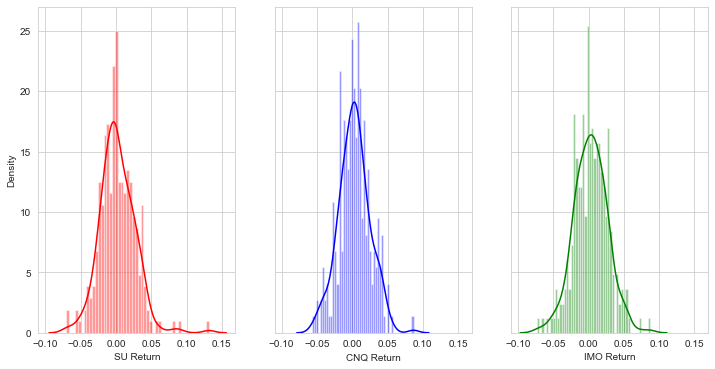

In [185]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(CAD_returns.loc['2021-01-01':'2021-12-31']['SU Return'],
             color='red', bins=50, ax=axes[0])
sns.distplot(CAD_returns.loc['2021-01-01':'2021-12-31']['CNQ Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(CAD_returns.loc['2021-01-01':'2021-12-31']['IMO Return'], 
             color='green', bins=50, ax=axes[2])


<AxesSubplot:xlabel='EOG Return', ylabel='Density'>

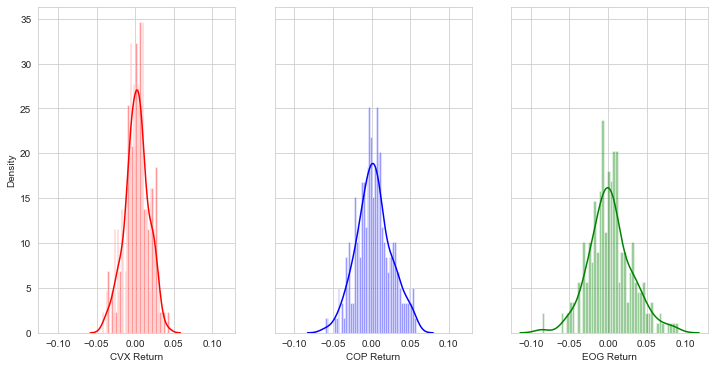

In [186]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(US_returns.loc['2021-01-01':'2021-12-31']['CVX Return'], 
             color='red', bins=50, ax=axes[0])
sns.distplot(US_returns.loc['2021-01-01':'2021-12-31']['COP Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(US_returns.loc['2021-01-01':'2021-12-31']['EOG Return'], 
             color='green', bins=50, ax=axes[2])

## The other way to look at stock price correlation is to create a heatmap. 

<AxesSubplot:xlabel='Entity', ylabel='Entity'>

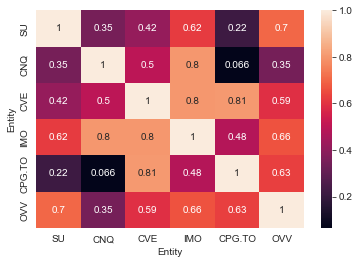

In [187]:
sns.heatmap(cop.xs(key='Adj Close',axis=1,level='Stock').corr(),annot=True)

# Moving average for Ovintiv

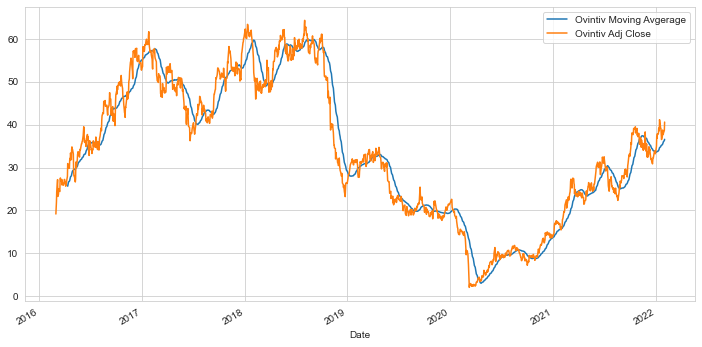

In [190]:
plt.figure(figsize=(12,6))
Ovintiv['Adj Close'].loc['2011-01-01':'2022-03-01'].rolling(window=30).mean().plot(
    label='Ovintiv Moving Avgerage')
Ovintiv['Adj Close'].loc['2011-01-01':'2022-03-01'].plot(
    label='Ovintiv Adj Close')

plt.legend()

## Create a candle plot for Ovintiv stocks at year 2021. This financial chart takes a dataset that contains open, high, low and close values for specific time period 

In [191]:
Ovintiv[['Open', 'High', 'Low', 'Close']].loc['2019-12-31':'2021-12-31'].iplot(kind='candle')


In [192]:
Ovintiv.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,21.85,20.200001,21.850000,21.500000,4488440.0,19.161894
2016-03-02,23.10,20.900000,20.950001,22.950001,4569200.0,20.454208
2016-03-03,25.15,22.600000,22.850000,24.650000,4472040.0,21.969330
2016-03-04,28.50,24.500000,25.150000,27.350000,8429520.0,24.375711
2016-03-07,30.65,27.100000,27.400000,30.500000,6455780.0,27.183153


In [193]:
Ovintiv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1493 entries, 2016-03-01 to 2022-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1493 non-null   float64
 1   Low        1493 non-null   float64
 2   Open       1493 non-null   float64
 3   Close      1493 non-null   float64
 4   Volume     1493 non-null   float64
 5   Adj Close  1493 non-null   float64
dtypes: float64(6)
memory usage: 113.9 KB


In [194]:
Cenovus_fltr = web.DataReader("CVE", 'yahoo', start, end)
dt_range = pd.date_range(start="2020-01-01", end="2021-03-01")
Cenovus_fltr = Cenovus_fltr[Cenovus_fltr.index.isin(dt_range)]
Cenovus_fltr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2020-01-02 to 2021-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       292 non-null    float64
 1   Low        292 non-null    float64
 2   Open       292 non-null    float64
 3   Close      292 non-null    float64
 4   Volume     292 non-null    float64
 5   Adj Close  292 non-null    float64
dtypes: float64(6)
memory usage: 16.0 KB


In [195]:
Suncor_fltr = web.DataReader("SU", 'yahoo', start, end)
Suncor_fltr = Suncor_fltr[Suncor_fltr.index.isin(dt_range)]

In [196]:
ExxonMobil_fltr = web.DataReader("XOM", 'yahoo', start, end)
ExxonMobil_fltr = ExxonMobil_fltr[ExxonMobil_fltr.index.isin(dt_range)]

In [197]:
fig = go.Figure(data=[go.Candlestick(x=Suncor_fltr.index,
                open=Suncor_fltr['Open'],
                high=Suncor_fltr['High'],
                low=Suncor_fltr['Low'],
                close=Suncor_fltr['Close'])])
                      

fig.update_layout(
    title='The Pandemic Downturn',
    yaxis_title='Suncor Stock Price, USD',
    shapes = [dict(
        x0='2021-03-01', x1='2021-03-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-03-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Pandemic Starts')]
)

fig.show()

In [198]:
fig = go.Figure(data=[go.Candlestick(x=ExxonMobil_fltr.index,
                open=ExxonMobil_fltr['Open'],
                high=ExxonMobil_fltr['High'],
                low=ExxonMobil_fltr['Low'],
                close=ExxonMobil_fltr['Close'])])
                      

fig.update_layout(
    title='The Pandemic Downturn',
    yaxis_title='ExxonMobil Stock Price, USD',
    shapes = [dict(
        x0='2021-03-01', x1='2021-03-01', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2021-03-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Pandemic Starts')]
)

fig.show()

## Create a Simple Moving Averages (SMA) plot of Ovintiv for the year 2020, passing three periods[10,30,50]

In [199]:
Ovintiv['Adj Close'].loc['2021-01-01':'2021-12-31'].ta_plot(
    study='sma',periods=[10,30,50],title='Simple Moving Averages')

## Look at Bollinger statistical chart characterizing the stock prices and volatility over time for Ovintiv year 2020

In [201]:
Ovintiv['Adj Close'].loc['2020-01-01':'2021-12-31'].ta_plot(study='boll')

## Let's call for closing stock price for all the companies once again

In [202]:
cop = web.DataReader(CAD_stocks,'yahoo',start=start,end=end)['Adj Close']
cop.head()

Symbols,SU,CNQ,CVE,IMO,CPG.TO,OVV
Date,,,,,,
2016-03-01,18.696671,15.100145,10.503314,26.617958,14.881888,19.161890
2016-03-02,18.772156,15.803790,10.735331,26.870464,15.127432,20.454212
2016-03-03,18.840086,17.239218,10.878112,27.136263,15.592221,21.969336
2016-03-04,19.111822,18.175060,11.190447,27.526653,15.820228,24.375710
2016-03-07,19.655285,18.393190,11.386771,27.883821,16.399012,27.183147


In [203]:
usop = web.DataReader(USA_stocks,'yahoo',start=start,end=end)['Adj Close']
usop.head()

Symbols,XOM,CVX,COP,EOG,OXY
Date,,,,,
2016-03-01,60.336693,66.129189,29.442883,57.150970,55.790649
2016-03-02,61.390785,66.904663,31.177328,58.891338,56.709290
2016-03-03,61.168098,67.204132,32.945957,60.869026,55.822338
2016-03-04,61.086456,67.511230,35.133228,62.767632,55.212547
2016-03-07,62.697323,69.614944,35.372478,66.336258,55.711475


## How do the returns corelate for competitors - Ovintiv and CNRL?

In [18]:
## OXY and ConocoPhillips were hit the most among largest US producers 

In [206]:
#Canadian companies stock correlation
cop_comp = cop.pct_change()
corr_cop = cop_comp.corr()
#American companies stock correlation
usop_comp = usop.pct_change()
corr_usop = usop_comp.corr()

Text(0, 0.5, 'Returns CNRL')

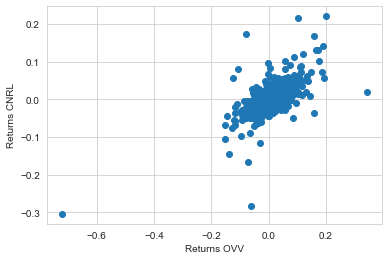

In [208]:
plt.scatter(cop_comp.OVV,cop_comp.CNQ)
plt.xlabel('Returns OVV')
plt.ylabel('Returns CNRL')
## We can see some positive correlations - the higher OVV, the higher CNQ

Text(0, 0.5, 'Returns EOG')

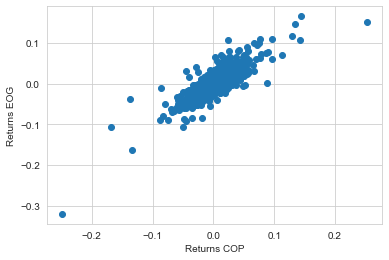

In [209]:
plt.scatter(usop_comp.COP,usop_comp.EOG)
plt.xlabel('Returns COP')
plt.ylabel('Returns EOG')
## The higher COP, the higher EOG

## Another way to look at the returns for Canadian CVE and CNQ

Text(0, 0.5, 'CrescentPoint Returns')

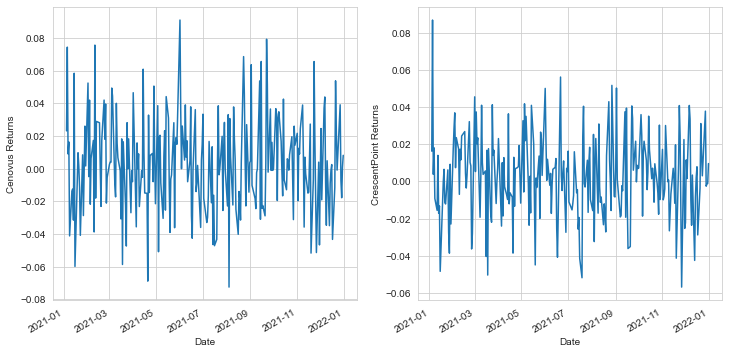

In [210]:
CVE_ret = Cenovus['Adj Close'] / Cenovus['Adj Close'].shift(1) - 1
CNRL_ret = CNRL['Adj Close'] / CNRL['Adj Close'].shift(1) - 1


fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

CVE_ret.loc['2021-01-01':'2022-01-01'].plot(figsize=(12,6), label='return', ax=axes[0])
axes[0].set_ylabel('Cenovus Returns')
CNRL_ret.loc['2021-01-01':'2022-01-01'].plot(figsize=(12,6), label='return', ax=axes[1])
axes[1].set_ylabel('CrescentPoint Returns')
#plt.tight_layout()

## At the end I would like to look at the stocks with high and low risks

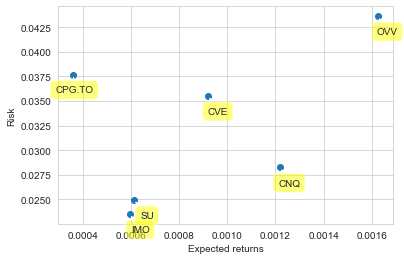

In [211]:
plt.scatter(cop_comp.mean(), cop_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(cop_comp.columns, cop_comp.mean(), cop_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [212]:
#Canadian Imperial and Suncor have a stocks with lower risks

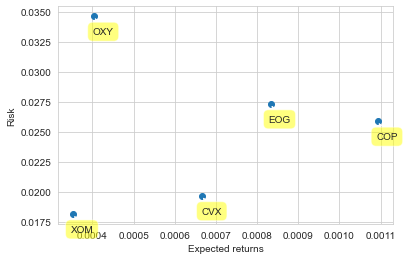

In [213]:
plt.scatter(usop_comp.mean(), usop_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(usop_comp.columns, usop_comp.mean(), usop_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
#American Exxon and Chevron have a stocks with lower risks